# City of Calgary Traffic Incidents Exploratory Data Analysis

## 1. Introduction

### 1.1 Project Overview

The City of Calgary is consistently rated as one of the best places to live in the world according to the [EIU](https://moving2canada.com/news-and-features/features/planning/destination-guides/calgary/2022-eiu-liveability-index-three-canadian-cities-top-ten/). With its proximity to the Rocky Mountains and it's large business sector, Calgary provides to all demographics an excellent place to call home. With all the locations to visit within and around the city, Calgary has an avid commuter culture. I happen to be one such commuter.

During my commuting time, I stick to roads in the southwest quadrant of the city and have never been in a traffic incident. However, many traffic incidents are reported via radio at high volume times. Combining this with my recent exploration of northwest and northeast quadrants of the city, I began to ask myself whether I am at a higher risk of being in an accident. Naively, I would assume that smaller roads and more cars would mean more incidents. In particular, downtown streets or busy highways with small merges seem like the most likely place to have an incident.

The most dangerous roads in Calgary can be determined by using data from the traffic incident dataset provided by the City of Calgary's [open data](https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556) website. The data from this website can be used to get insight into the traffic incident patterns of the burgeoning metropolitan city  by utilizing exploratory data analysis and further data exploration techniques such as predictive modeling. 

### 1.2 Literature Review and background

Traffic incidents are a heavily researched area. The [World Health Organization](https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries) has an overview of traffic incidents within the global picture. Some key points are below:
- Approximately 1.3 million individuals die each year as a result of a traffic incident.
- 93% of the world's fatalities on the roads occur in low- and middle-income countries, even though these countries have approximately 60% of the world's vehicles.

The global stats aid in guiding the data analysis. The data from Calgary will be expected to show us a higher number of traffic incidents in lower income areas, such as Forest Lawn.

Research has also been done on a more focused level within the City of Calgary. The dataset this project focuses on has been at the center of analysis before. Data analysis of the 2020 traffic incidents compared to 2019 was completed [here](https://pub-calgary.escribemeetings.com/filestream.ashx?DocumentId=189649). It shows a sharp decline in overall incidents. Which is to be expected during the height of the lockdown in Alberta, Canada. While the linked paper focuses more on the stats from 2019 compared to 2020, this project is meant to paint a larger overall picture using the complete dataset. With the increase in population and return to regular road use, analysing data from "normal" times is crucial to understanding incident heavy areas today.

Another more informal analysis was conducted by Siavash Fard, M.Sc., P.Eng., PMP, which is posted on [LinkedIn](https://www.linkedin.com/pulse/prediction-traffic-incidents-calgary-siavash-fard-/). This analysis attempts to predict future incidents using the traffic incident dataset used in this study, in addition to data regarding traffic control devices. The analysis focuses on prediction techniques, as opposed to visualizing and finding insights within the dataset.

The former studies show a solid area for this project to focus on. We can use the former research projects and define teh areas where we need to focus on below.

### 1.3 Aims and Objectives

To examine the nature of the traffic incidents in Calgary, the following questions will need to be answered:
1. Which areas of the city have the most incidents?
    - Hypothesis: Downtown roads and highways are to be the most dangerous roads.
2. What time of day has the highest number of incidents?
    - Hypothesis: Rush hours (8-9) and (5-6) are the most dangerous hours of a day.
3. Does the day, week, month, or year cause variance in the frequency of incidents?
    - Hypothesis: Winter months and weekdays are the most dangerous times to be on the road.
4. What kind of incidents are happening?
    - Does the type of incident affect the time between the start and end of accident?
    - Does the type of incident change based on location in the city?
    
Answering these questions will allow us to pinpoint unsafe areas during a commute within the city. The data source noted that the dataset is updated every 10 minutes with new traffic incidents. Therefore, as the dataset grows, we will be able to bring in more data to more thoroughly examine the nature of traffic incidents in Calgary.

### 1.4 Introduction Summary

Understanding the dangers of commuting within Calgary will shed some light on areas to avoid during certain hours. Furthermore, it can also be used to help city planners develop solid plans to mitigate problem areas. Let us move on to importing the data we will use for the project.

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library to get most up to date csv from open Calgary
from sodapy import Socrata

# Module to help in handling NaN values
import random

## 2. Data Acquisition and Justification 

### 2.1 Data Source and Review

As mentioned previously, we will be focusing on traffic incident data provided by the City of Calgary. This data is an archive of reported traffic incidents within the city. These traffic incidents range from stalled vehicles to multi-vehicle collisions. The dataset is updated every ten minutes and has been updated since December 4th, 2017. Analyzing this dataset will answer the research questions, and it provides a large enough dataset to gain meaningful insights into the traffic incidents in Calgary.

Traffic incidents are collected via an advanced traveler information system, or ATIS, which collects information from a wide source of inputs. Inputs include commuter reported incidents via the WAZE application and traffic cameras. More information about Calgary's ATIS can be found [here](https://www.calgary.ca/roads/conditions/advanced-traveller-information-system.html).

This dataset provides the most accurate picture of Calgary traffic incidents available for public use. It does however have its flaws. The website indicates, "please note there may be gaps in the data due to system or script malfunction." This is a good indicator of problems areas to view during data cleansing. The data is also limited by the methods of reporting, for example instances where individuals may decide not to report. Instances of false positives, or errors in collection methodology. Ensuring effective data wrangling is employed will ensure the data is accurate and reasonably scrutinized.

### 2.2 Data Comparison

This data set is well suited to answer our research questions. This can be confirmed by comparing it to other sources of data within the traffic of Calgary sphere of information.

The [Calgary Traffic Counts System](https://trafficcounts.calgary.ca/) is another open data source provided by the city of Calgary. It provides data related to traffic around major intersections. This data has been collected for over 40 years. Which would paint a much better historical picture of the traffic situation in Calgary. The data does not explicitly show incidents, rather the overall use of the roads within Calgary. It would be better suited towards understanding the growth and use of the roads in general as opposed to the roads and times which are the most dangerous.

Considering the sources for accurate data are quite slim, we are limited to data provided by either the Alberta government or the City of Calgary. An example of data from the Alberta government can be found [here](https://open.alberta.ca/opendata/traffic-collision-casualties-alberta). This dataset is a high level overview of the number of incidents, deaths and injuries by year related to traffic incidents. Going from 2001-2014. This dataset paints an overall picture. However, each incident does not have associated information, there's no precise date and there is not any true analysis to follow because the dataset is so simple. It could be useful as supplementary data for this project. Comparing and contrasting Calgary's total incident rater to the provinces. Overall it is not ideal for our research area.

### 2.3 Scope of work

To answer the research questions; Patterns, trends and insights will need to be found within our dataset. To ensure these goals are met, the project will follow the below scope of work.

- Import the dataset and conduct initial data exploration and cleaning. 
    - i.e. check for missing values, boundary cases or possible inaccuracies and validate data types.
- Modify the data by adjusting any problem areas found in the prior step.
- Conduct exploratory data analysis to bring the patterns, insights and trends to the surface which will answer our research questions.
- Evaluate and summarize the findings brought to light by the EDA, ensuring these are linked back to the research questions.
- Reflect on the process and outcomes of the EDA, from start to finish. Observing any potential mis-steps or areas that could be improved.

This scope of work will ensure our research questions are answered. It will also allow for the data to be further processed and involved in future predictive modeling or machine learning algorithm to help gain further insights into traffic incidents in the City of Calgary.

### 2.4 Loading the Data

#### Marker Note
The below code was taken directly [this](https://stackoverflow.com/questions/46572365/import-data-to-dataframe-using-soda-api) stack overflow post.

If the below code does not execute, a back-up file is provided. The data was saved on May 28th, 2023.

In [2]:
# Load updated data from https://data.calgary.ca/Transportation-Transit/Traffic-Incidents/35ra-9556

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
##client = Socrata("data.calgary.ca", None)

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
##results = client.get_all("35ra-9556")

# Convert to pandas DataFrame
##df = pd.DataFrame.from_records(results)

In [3]:
# BACK UP CODE IF API FAILS.

df = pd.read_csv("traffic-incidents-05-30-2023.csv")

### 2.4 Data Acquisition and Justification Summary

The dataset from open Calgary combined with our review of similar research papers/analysis will allow us to ask important questions and provide accurate insights that have yet to be explored.

## 3. Data Exploration and Cleaning

### 3.1 Data Exploration

The dataset is to be explored in a simple manner in this section to ensure the data is ready for analysis. Which includes, understanding the rows and column values. Removing unneeded data and adjusting invalid values.

In [4]:
df.shape

(39814, 13)

The shape property shows us that there have been approximately 40,000 traffic incidents since this dataset has started collection. The dataset also has 13 points of data per incident to analyse and compare. An idea about the data columns and their irrespective information can be gathered by using the columns, head(), tail(), sample(), info(), and describe() properties/methods on the dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39814 entries, 0 to 39813
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   incident_info                39814 non-null  object 
 1   description                  39812 non-null  object 
 2   start_dt                     39814 non-null  object 
 3   modified_dt                  25757 non-null  object 
 4   quadrant                     25755 non-null  object 
 5   longitude                    39814 non-null  float64
 6   latitude                     39814 non-null  float64
 7   count                        39814 non-null  int64  
 8   id                           39814 non-null  object 
 9   point                        39814 non-null  object 
 10  :@computed_region_kxmf_bzkv  39721 non-null  float64
 11  :@computed_region_4a3i_ccfj  39721 non-null  float64
 12  :@computed_region_4b54_tmc4  39718 non-null  float64
dtypes: float64(5), i

The info method indicates we have a dataset that is fairly healthy. However, it is clear the datatype of 6 columns need to be adjusted to ensure proper analysis can take place. The column's description, modified_dt and quadrant all have null values in them. Description only has two which would indicate an easy fix can take place, while the latter two will need a more complex fix as close to 40% of their values are null. This would skew any data analysis we produce if we leave them as is. Methodology for fixing these values will be followed in the cleaning portion of this section.

In [6]:
# get the first 5 rows of dataset
df.head()

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
0,68 Street north of 32 Avenue NE,Traffic incident.,2023-05-30T18:40:52.000,2023-05-30T19:11:29.000,NE,-113.935126,51.082180,1,2023-05-30T18:40:5251.082180180176614-113.9351...,"{'type': 'Point', 'coordinates': [-113.9351261...",161.0,4.0,9.0
1,Woodpark Boulevard and Woodpark Avenue SW,Traffic incident.,2023-05-30T18:37:07.000,2023-05-30T19:11:29.000,SW,-114.109466,50.947267,1,2023-05-30T18:37:0750.94726710588861-114.10946...,"{'type': 'Point', 'coordinates': [-114.1094664...",216.0,1.0,5.0
2,Evanston Drive and Evanston Hl NW,Traffic incident.,2023-05-30T18:10:10.000,2023-05-30T18:42:16.000,NW,-114.111164,51.179749,1,2023-05-30T18:10:1051.17974859950634-114.11116...,"{'type': 'Point', 'coordinates': [-114.1111640...",237.0,2.0,3.0
3,Macleod Trail and 69 Avenue SW,Traffic incident. Blocking multiple lanes,2023-05-30T18:00:26.000,2023-05-30T18:01:55.000,NW,-114.071656,50.991433,1,2023-05-30T18:00:2650.991433177037095-114.0716...,"{'type': 'Point', 'coordinates': [-114.0716556...",120.0,1.0,8.0
4,Northbound Shaganappi Trail north of Stoney T...,Traffic incident. Blocking the left lane,2023-05-30T17:39:58.000,2023-05-30T17:42:19.000,NW,-114.140886,51.154299,1,2023-05-30T17:39:5851.154298543179905-114.1408...,"{'type': 'Point', 'coordinates': [-114.1408859...",220.0,2.0,3.0


From df.head() a few observations can be made.
- ***incident_info*** contains the street(s) the incident took place on.
- ***description*** is a brief sentence regarding the type of incident.
    - "Traffic incident" is not descriptive and takes up 4 of the 5 data points. How many incidents are labelled with this information?
- ***start_dt and modified_dt*** contain the start and end of the reporting of said incident.
    - Potential to use these columns to get total time of clean-up and get an inference on the severity of the accident based on new total_time column.
- ***quadrant*** is what part of the city the incident took place in.
- ***longitude and latitude*** store the longitude and latitude respectively.
- ***count*** has an unknown meaning. The open Calgary website does not have any information on this column.
    - All columns appear to have the value 1? Will need to confirm and if so remove from dataframe.   
- ***id*** is the identifier of the incident. It contains a concatenation of the start_dt, latitude and longitude columns
    - This column appears to be what is current sorting the dataframe.
    - This column is another candidate to be removed from the dataframe as sorting by start_dt is equivalent.   
- ***point*** stores a JSON object which contains information for a point containing the longitude and latitude
    - Appears to be an object used within sodapy. Could be useful for a map visualization.
    - If the point column make it easy to visualise data on a map, the longitude and latitude columns could be removed. Or vice versa.
- The last three columns appear to be a byproduct of the SODA API. The open Calgary website does not list these and [this](https://hub.safe.com/publishers/cdesisto/templates/socrata_computed_columns) website confirms this.
    - When cleaning data these three columns are to be dropped as they provide no usable data.

In [7]:
# Display the last 5 elements to get an idea of the end of the dataframe.
df.tail()

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
39809,Southbound University Drive at Crowchild Trail NW,2 vehicle incident.,2016-12-06T17:05:00.000,2016-12-06T17:10:00.000,NW,-114.119584,51.066391,1,2016-12-06T17:05:0051.06639113-114.1195835,"{'type': 'Point', 'coordinates': [-114.1195835...",154.0,2.0,7.0
39810,Ogden Road at Bonnybrook Road SE,2 vehicle incident.,2016-12-06T16:26:00.000,2016-12-06T16:38:00.000,SE,-114.030872,51.028393,1,2016-12-06T16:26:0051.02839263-114.0308717,"{'type': 'Point', 'coordinates': [-114.0308717...",98.0,3.0,10.0
39811,Macleod Trail at 9 Avenue SE,2 vehicle incident.,2016-12-06T16:25:00.000,2016-12-06T16:26:00.000,SE,-114.058178,51.044471,1,2016-12-06T16:25:0051.04447099-114.0581785,"{'type': 'Point', 'coordinates': [-114.0581785...",262.0,3.0,7.0
39812,Eastbound Memorial Drive approaching Deerfoot ...,2 vehicle incident blocking the middle lane.,2016-12-06T14:36:00.000,2016-12-06T14:42:00.000,NE,-114.020548,51.047634,1,2016-12-06T14:36:0051.0476343-114.0205479,"{'type': 'Point', 'coordinates': [-114.0205479...",137.0,4.0,10.0
39813,Eastbound McKnight Boulevard at 2 Street NW,Multi vehicle incident.,2016-12-06T10:00:00.000,2016-12-06T10:01:00.000,NW,-114.064987,51.096111,1,2016-12-06T10:00:0051.09611149-114.0649874,"{'type': 'Point', 'coordinates': [-114.0649874...",192.0,2.0,2.0


We can see that the data goes back to 2016 instead of our initial understanding of 2017. This appears to of been an error on open Calgary's end. 

There is nothing out of the ordinary or not previously understood from df.head().

In [8]:
# Get a random selection of 5 data points to get a better picture of the data as a whole.
df.sample(5)

,incident_info,description,start_dt,modified_dt,quadrant,longitude,latitude,count,id,point,:@computed_region_kxmf_bzkv,:@computed_region_4a3i_ccfj,:@computed_region_4b54_tmc4
33002,Eastbound Memorial Drive and 52 Street SE,Two vehicle incident. Blocking the left lane.,2018-02-23T17:21:00.000,2018-02-23T18:43:00.000,SE,-113.955816,51.053260,1,2018-02-23T17:21:3651.0532597236711-113.955815...,"{'type': 'Point', 'coordinates': [-113.9558159...",194.0,3.0,12.0
19299,5 Avenue and 1 Street SE,Traffic signals are flashing red. Crews have ...,2020-08-26T16:48:00.000,NaN,NaN,-114.060367,51.048319,1,2020-08-26T16:48:1651.048319374222565-114.0603...,"{'type': 'Point', 'coordinates': [-114.060367,...",262.0,3.0,7.0
10917,Northbound 52 Street and 90 Avenue SE,Traffic incident. Blocking multiple lanes,2021-12-12T14:49:00.000,2021-12-12T15:29:00.000,SE,-113.959204,50.972351,1,2021-12-12T14:49:5850.972351200435185-113.9592...,"{'type': 'Point', 'coordinates': [-113.9592036...",105.0,3.0,10.0
5891,Bowness Road and Point Drive NW,Traffic incident.,2022-08-25T16:18:01.000,2022-08-25T17:15:24.000,NW,-114.146365,51.062205,1,2022-08-25T16:18:0151.062204720019544-114.1463...,"{'type': 'Point', 'coordinates': [-114.1463652...",131.0,2.0,7.0
10978,Southbound Crowchild Trail and Sarcee Trail NW,Single vehicle incident. Blocking the middle lane,2021-12-10T07:54:00.000,2021-12-10T09:32:00.000,NW,-114.179519,51.110997,1,2021-12-10T07:54:4251.11099699784499-114.17951...,"{'type': 'Point', 'coordinates': [-114.1795187...",147.0,2.0,3.0


More observations can be made with the sample method.
- The description field is confirmed to contain simple descriptions about the incident.
    - Simple NLP processing and word mapping is a good starting point for processing this column.
- NaN appears in both modified_dt and quadrant. 
    - We can infer the value of NaN in modified_dt by taking the average total time of incidents of the same calibre.
    - The quadrant NaN can be inferred from the incident_info column.

### 3.2 Data Cleaning

Using the information from above. The dataframe can be cleaned to reduce its complexity, remove invalid values and simplify analysis.
This process is started by removing the count, id and last three columns.

#### 3.21 Remove bloat columns

In [9]:
# Get list of current columns to confirm starting configuration.
df.columns

Index(['incident_info', 'description', 'start_dt', 'modified_dt', 'quadrant',
       'longitude', 'latitude', 'count', 'id', 'point',
       ':@computed_region_kxmf_bzkv', ':@computed_region_4a3i_ccfj',
       ':@computed_region_4b54_tmc4'],
      dtype='object')

In [10]:
# Confirm values in "count" column
df["count"].unique()

array([1])

The unique method returned one value. Thereby confirming the count column serves no purpose for this analysis. It will be removed alongside id and the last 3 columns. The former of which does not serve a purpose as it's a concatenation of three other columns. The latter of which were confirmed to be byproducts from the SODA API and not needed in the analysis.

In [11]:
# Remove "count" and last three columns from dataframe.
df.drop(columns=[':@computed_region_kxmf_bzkv', ':@computed_region_4a3i_ccfj', ':@computed_region_4b54_tmc4', 'count',
                 'id'], inplace=True)

# Confirm columns left in dataframe
df.columns

Index(['incident_info', 'description', 'start_dt', 'modified_dt', 'quadrant',
       'longitude', 'latitude', 'point'],
      dtype='object')

Remaining columns are correct and unneeded columns are removed.

#### 3.22 Change datatypes of columns

The datatype of each column needs to be adjusted to ensure proper analysis can take place. Below we can see that almost all columns are of object type which is not ideal. The columns incident_info, description and quadrant are all better represented as strings, and any column to do with time is better represented as a datetime object.

In [12]:
df.dtypes

incident_info     object
description       object
start_dt          object
modified_dt       object
quadrant          object
longitude        float64
latitude         float64
point             object
dtype: object

In [13]:
# Adjust all columns to have the proper data type.

# Change columns that are better represented as strings to string datatype.
df[['incident_info', 'description', 'quadrant']] = df[['incident_info', 'description', 'quadrant']].astype('string')
# trim any whitespace from string objects to allow for easier string manipulation.
df = df.apply(lambda x: x.str.strip() if x.dtype == 'string' else x)

# Change columns that are better represented as datetime objects to datetime64 datatype.
df[['start_dt', 'modified_dt']] = df[['start_dt', 'modified_dt']].apply(pd.to_datetime)

df.dtypes

incident_info            string
description              string
start_dt         datetime64[ns]
modified_dt      datetime64[ns]
quadrant                 string
longitude               float64
latitude                float64
point                    object
dtype: object

All columns are now represented by are more accurate datatype.

#### 3.23 Remove null values

Any null values now need to be adjusted to ensure analysis is accurate. We can see below that the dataset is fairly healthy. However, there are problem areas in 3 columns. description, modified_dt and quadrant. Description we can replace null values with Traffic incident. as that is the most common value in description. The former two will need more complex processing to ensure our analysis is accurate.

In [14]:
df.isnull().sum()

incident_info        0
description          2
start_dt             0
modified_dt      14057
quadrant         14059
longitude            0
latitude             0
point                0
dtype: int64

In [15]:
# Fill any null values in description with "Traffic incident."
df['description'].fillna('Traffic incident.', inplace=True)

# Confirm percent of valid quadrant values before adjusting.
df['quadrant'].value_counts(normalize=True, dropna=False)

<NA>    0.353117
SE      0.205782
NE      0.165193
NW       0.14299
SW      0.132918
Name: quadrant, dtype: Float64

The current values in the quadrant column are only valid in ~65% of the datapoints. This is too low to ignore and will need to be adjusted. Knowing that the incident info column has the quadrant at the end of the string, we can use this to adjust the NaN values.

In [16]:
# Remove NaN values from quadrant

# Replace NaN quadrant values with last two characters of incident_info. As this will populate more of the quadrant data.
df['quadrant'].fillna(df['incident_info'].str[-2:], inplace=True)

# Confirm quadrant data is now more accurate.
df['quadrant'].value_counts(normalize=True, dropna=False)

SE    0.323178
NE    0.263827
SW    0.203446
NW    0.201286
 N    0.003089
 S    0.002461
 E    0.001005
ge    0.000628
 W    0.000151
ad    0.000126
ry    0.000126
vd    0.000075
rd    0.000075
ea    0.000075
st     0.00005
il     0.00005
t;     0.00005
th     0.00005
nW    0.000025
nE    0.000025
 2    0.000025
er    0.000025
ve    0.000025
re    0.000025
mp    0.000025
ls    0.000025
ue    0.000025
et    0.000025
Name: quadrant, dtype: Float64

The 4 quadrants now account for 98% of the data as opposed to the ~60% we saw with all the null values at the start. The remaining 2% erroneous data can be replaced with a random selection from the quadrants list as it will allow for easier processing, won't skew the data significantly and will validate all values in quadrant.

In [17]:
quadrants = ['SE', 'NE', 'SW', 'NW']

# If The current value in quadrant is not in the above list, replace it with a random value from said list.
df['quadrant'] = df['quadrant'].apply(lambda x: x if x in quadrants else random.choice(quadrants))

# Confirm values in quadrant are now correct and not skewed from original values.
df['quadrant'].value_counts(normalize=True, dropna=False)

SE    0.325162
NE    0.265635
SW    0.206108
NW    0.203094
Name: quadrant, dtype: float64

Erroneous values now need to be removed from modified_dt due to the large amount of missing data. The best option for this is to replace the NaN value with the average time it takes to clean up an accident added on to the start_dt. To get the average time, a new column called total_time will be created to hold the total time per accident. Which is the modified_dt minus start_dt.

In [18]:
# Remove NaN values from modified_dt

"""
To create total time, modified_dt first needs to have all it's NaN values changed to a valid entry. This can be changed to the equivalent start_dt at the start.
Which will create a total_time of 0 minutes.
"""

df['modified_dt'].fillna(df['start_dt'], inplace=True)

# Create total_time column which is modified_dt - start_dt.
total_time = (df['modified_dt'] - df['start_dt'])

# Insert total_time into dataframe after modified_dt.
df.insert(loc=4,
          column='total_time',
          value=total_time)

<AxesSubplot:>

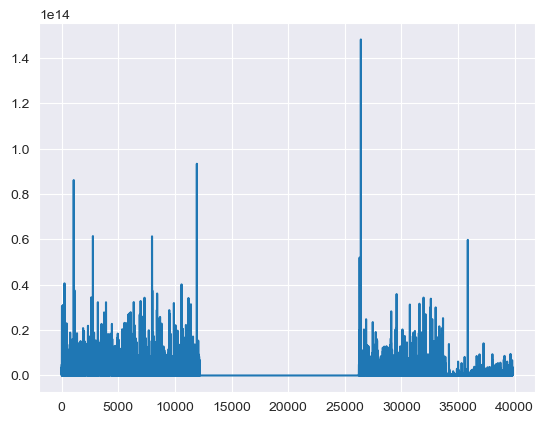

In [19]:
df['total_time'].plot()

In [20]:
# Convert total time to integer representing minutes to allow for easier boolean comparisons to find time with 0.
df['total_time'] = df['total_time'] / pd.Timedelta(minutes=1)

# Produce a new dataframe with the mean of total time with incidents of the same value.
mean_values_df = df[['description', 'total_time']]
mean_values_df.drop(df[df['total_time'] == 0.0].index, inplace=True)
mean_values_df = mean_values_df.groupby('description').mean(numeric_only=False)
count = 0
for index, row in df.iterrows():
    if row[4] == 0.0:
        try:
            df.at[index, 'total_time'] = mean_values_df.loc[row[1]]
        except:
            print(f'No total_time data for incident(s) with this description: {row[1]} NUMBER OF ERRORS:{count}')
            count = count + 1
df['total_time'] = pd.to_timedelta(df['total_time'], unit='min')

/var/folders/6n/gbq6bjbd3rq9q6nmwpv5y1h80000gn/T/ipykernel_12135/805626531.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mean_values_df.drop(df[df['total_time'] == 0.0].index, inplace=True)


No tot_time data for total time of incident(s) with this description: Traffic incident. Blocking the left lanes. Expect delays in the area NUMBER OF ERRORS:0
No tot_time data for total time of incident(s) with this description: Traffic signals are blank. Police is directing traffic NUMBER OF ERRORS:1
No tot_time data for total time of incident(s) with this description: There is an incident involving a cyclist- EMS on site. Road closed. NUMBER OF ERRORS:2
No tot_time data for total time of incident(s) with this description: Traffic incident. The road is closed WB at Macleod Tr NUMBER OF ERRORS:3
No tot_time data for total time of incident(s) with this description: Traffic incident. The ramp from NB Deerfoot to WB Stoney Tr is closed NUMBER OF ERRORS:4
No tot_time data for total time of incident(s) with this description: There is an incident involving a pedestrian- EMS on site. Blocking multiple lanes in the intersection NUMBER OF ERRORS:5
No tot_time data for total time of incident(s) w

In [21]:
count

2094

<AxesSubplot:>

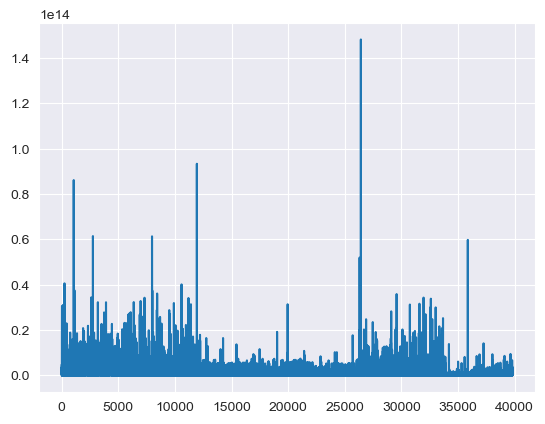

In [22]:
df['total_time'].plot()

## 7. References and Resources

### 7.1 References

### 7.2 Resources used

#### pandas Resources

- pandas.Series.value_counts - pandas 2.0.2 documentation. (n.d.). https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html 
- Random sampling from a list in Python (random.choice, Sample, choices). (n.d.). https://note.nkmk.me/en/python-random-choice-sample-choices/ 
- How to replace all values in a pandas dataframe not in a list?. Stack Overflow. https://stackoverflow.com/questions/34866856/how-to-replace-all-values-in-a-pandas-dataframe-not-in-a-list 
- (2023, May 9). Replace nan values with zeros in pandas DataFrame. GeeksforGeeks. https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/ 
- Pandas: Subtracting two date columns and the result being an integer. Stack Overflow. https://stackoverflow.com/questions/37840812/pandas-subtracting-two-date-columns-and-the-result-being-an-integer 

#### Data Analysis Resources

- Rob Mulla. (2021). Exploratory Data Analysis with Pandas Python 2023. YouTube. Retrieved May 30, 2023, from https://www.youtube.com/watch?v=xi0vhXFPegw&amp;t=372s.
- Bhutaiya, R. (2022, February 25). Pandas - EDA: Smart way to replace nan. Medium. https://medium.com/analytics-vidhya/pandas-eda-smart-way-to-replace-nan-554aedc0b5b6 